# Relaciones

Sean los conjuntos $X$ e $Y$. Cualquier subconjunto $R \subseteq X \times X$ se dice relación de x {\displaystyle x} x sobre y {\displaystyle y} y. Por tanto, una relación es un conjunto de pares ordenados, de modo que toda función f : x ⟶ y {\displaystyle f:x\longrightarrow y} {\displaystyle f:x\longrightarrow y} es una relación, si bien lo recíproco no es necesariamente cierto, pues puede una relación no cumplir (f-1) o (f-2) (o ambas) de 1.7.1 . De ésto, resulta conveniente adoptar una notación diferente a la que se usó con las funciones para expresar el hecho de que ( a , b ) ∈ R {\displaystyle (a,b)\in \mathrm {R} } {\displaystyle (a,b)\in \mathrm {R} }. Así pues, escribiremos


In [217]:
X={'a','b','c','d'}

R={('a','b'),('b','c'),
   ('c','a'),('a','a'),
   ('b','b'),('c','c'),
   ('b','a'),('c','b'),('c','d'),('d','c'),
   ('a','c'),('d','a'),('a','d'),('d','d')}


In [218]:
producto_cartesiano = lambda X : {(a,b) for a in X for b in X}

In [219]:
G=producto_cartesiano(X)

print(G)
print(R.issubset(G))


{('c', 'b'), ('b', 'c'), ('d', 'a'), ('b', 'b'), ('c', 'c'), ('c', 'd'), ('b', 'd'), ('d', 'd'), ('a', 'c'), ('c', 'a'), ('d', 'b'), ('b', 'a'), ('a', 'd'), ('d', 'c'), ('a', 'b'), ('a', 'a')}
True


In [220]:
len(G)

16

In [221]:
reflexiva = lambda R :{a for (a,b) in R if a==b} == {a for (a,b) in R} | {b for (a,b) in R}

simetrica = lambda R :{(b,a) for (a,b) in R if a!=b}.issubset(R)

transitiva = lambda R : {(a,d) for (a,b) in R for (c,d) in R if b==c and a!=d}.issubset(R)

In [6]:
print(G)
print('simetrica:',simetrica(G))

{('c', 'b'), ('b', 'c'), ('d', 'a'), ('b', 'b'), ('c', 'c'), ('c', 'd'), ('b', 'd'), ('d', 'd'), ('a', 'c'), ('c', 'a'), ('d', 'b'), ('b', 'a'), ('a', 'd'), ('d', 'c'), ('a', 'b'), ('a', 'a')}
simetrica: True


In [7]:
transitiva(G)

True

# Tarea 1

    1. Extender el producto cartesiano de dos conjuntos hacia 3 conjuntos
    2. Extender las funciones para chequear relaciones binarias a 3-arias

In [271]:
class Line:
    def __init__(self, _p1, _p2):
        self.points = {_p1,_p2}
        
    def __hash__ ( self ):
        id=0
        for point in self.points:
            id+=hash(point)
        return id
    
    def __eq__ ( self , other ):
        return self.points==other.points 

    def slope(self):
        p1=list(self.points)[0]
        p2=list(self.points)[1]
        if (p2[0]-p1[0])==0:
            return 0
        elif (p2[1]-p1[1])==0:
            return 1
        else:
            return (p2[1]-p1[1])/(p2[0]-p1[0])
        
    def intercept(self):
        m=self.slope()
        p1=list(self.points)[0]
        return p1[1] - m * p1[0]

    def is_orthogonal(self,other):
        m1=self.slope()
        m2=other.slope()
        if m1!=m2:
            return m1*m2==-1.
        else:
            return False

    def is_parallel(self,other):
        m1=self.slope()
        m2=other.slope()
        return m1==m2        
    
    def __str__(self):
        return str(self.points) 
    
    def __repr__(self):
        return str(self.points) 
    
l1=Line((0,0),(1,1))
l2=Line((1,1),(0,0))
l3=Line((0,1),(1,0))

print(l1==l2)

print(l1.is_orthogonal(l3))

l4=Line((1,1),(2,2))
print(l1.is_parallel(l4))

True
True
True


In [223]:
l2.slope()

1

In [225]:
l1.slope()

1

In [226]:
hash(l1)

7426162181343821312

In [227]:
hash(l2)

7426162181343821312

In [228]:
l1

{(0, 0), (1, 1)}

In [229]:
l2

{(0, 0), (1, 1)}

# Tarea 2

Considere todas lineas que pasan por los puntos en $I=\{0,1,2,\ldots,10\}$, tal que cada linea une un punto $(a,b)$ con otro punto $(c,d)$ tal que $a,b,c,d \in I$.

   1. Defina una relación $\rho_1$ sobre lineas tal que $l_1 \perp l_2$ para todas las lineas $(l_1,l_2)$ en $\rho_1$ y $l_i \in \mathbb R^2$.
   2. Defina una relación $\rho_2$ sobre lineas tal que $l_1 \parallel l_2$ para todas las lineas $(l_1,l_2)$ en $\rho_2$ y $l_i \in \mathbb R^2$.
   3. Implemente una función para revisar reflexividad, simetría y transitividad sobre $\rho_1$ y $\rho_2$

In [272]:
I=set({0,1})

In [273]:
points={(x,y) for x in I for y in I}

In [274]:
#points

In [275]:
lines={Line(p1,p2) for p1 in points for p2 in points if p1!=p2}

In [276]:
lines

{{(0, 0), (1, 1)},
 {(0, 1), (0, 0)},
 {(0, 1), (1, 0)},
 {(0, 1), (1, 1)},
 {(1, 0), (0, 0)},
 {(1, 0), (1, 1)}}

In [277]:
len(lines)

6

In [278]:
n=len(points)

j=0
for i in range(1,n):
    j=j+i
print(j)

6


In [279]:
parallel={(l1,l2) for l1 in lines for l2 in lines if l1.is_parallel(l2)}

In [280]:
producto_cartesiano_lineas={(l1,l2) for l1 in lines for l2 in lines}

In [281]:
len(producto_cartesiano_lineas)

36

In [283]:
parallel.issubset(producto_cartesiano_lineas)

True

In [284]:
len(parallel)

14

In [285]:
parallel

{({(0, 0), (1, 1)}, {(0, 0), (1, 1)}),
 ({(0, 0), (1, 1)}, {(0, 1), (1, 1)}),
 ({(0, 0), (1, 1)}, {(1, 0), (0, 0)}),
 ({(0, 1), (0, 0)}, {(0, 1), (0, 0)}),
 ({(0, 1), (0, 0)}, {(1, 0), (1, 1)}),
 ({(0, 1), (1, 0)}, {(0, 1), (1, 0)}),
 ({(0, 1), (1, 1)}, {(0, 0), (1, 1)}),
 ({(0, 1), (1, 1)}, {(0, 1), (1, 1)}),
 ({(0, 1), (1, 1)}, {(1, 0), (0, 0)}),
 ({(1, 0), (0, 0)}, {(0, 0), (1, 1)}),
 ({(1, 0), (0, 0)}, {(0, 1), (1, 1)}),
 ({(1, 0), (0, 0)}, {(1, 0), (0, 0)}),
 ({(1, 0), (1, 1)}, {(0, 1), (0, 0)}),
 ({(1, 0), (1, 1)}, {(1, 0), (1, 1)})}

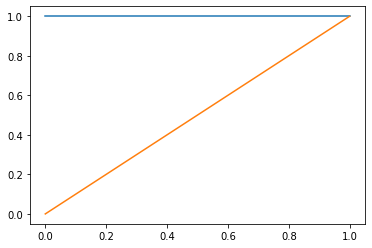

In [288]:
l1=Line((0, 1), (1, 1))
l2=Line((0, 0), (1, 1))
p1=list(l1.points)[0]
p2=list(l1.points)[1]
plt.plot([p1[0],p2[0]],[p1[1],p2[1]])
p3=list(l2.points)[0]
p4=list(l2.points)[1]
plt.plot([p3[0],p4[0]],[p3[1],p4[1]])
plt.show()

In [289]:
l1.is_parallel(l2)

True

In [290]:
l1.is_orthogonal(l2)

False

In [291]:
l1.slope()

1

In [292]:
l2.slope()

1.0